In [1]:
import geo_plot
import grunn
import geofunk
import math
import matplotlib.pyplot as plt
import numpy as np

Rekner gjennom eksempel i kap 6.9.1 i 2018 utgaven av Håndbok V220

All input i cellen under

In [2]:
#Jordparametere
tan_fi = 0.7
attraksjon = 10
z_lag = 5 #Mektighet lagpakke
u = 2 #Grunnvanstand
gamma = 20 #Tyngdetetthet

gamma_m = 1.4 #Materialfaktor

#Avledede parametere
tan_fi_d = tan_fi/gamma_m

#vertikalkrefter
fv_fund = 360
#Horisontalkrefter
fh = 120

#Dybde til underkant fundament
z = 2

helling_forhold = 0.33 #Hellingsforhold

#B0 for enkeltfundament
b0 = 4

#Antatt spenn for sålebredde, for å finne optimal b0
b0_min = 0.5
b0_maks = 5

fundament_tykkelse = 0.2 #Kunn brukt til plotting

In [3]:
#Først etableres jordlag med ein instans av klassen JordLag
#Parametrene er: navn, tykkelse, tyngdetetthet
grus = grunn.JordLag("grus", 500, 20)
sand = grunn.JordLag("sand", 1500, 19)
#Derretter settes styrkeparametrene for jordlagene
grus.sett_styrke_parameter(tanphi=tan_fi, attraksjon=attraksjon)
sand.sett_styrke_parameter(phi_grader=33, attraksjon=4)
#Så opprettes jordprofilen basert på dei enkelte jordlag
jordprofil = grunn.JordProfil([grus, sand], u=2)


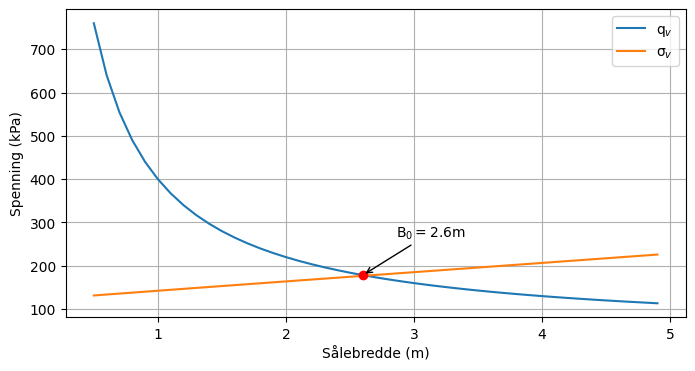

In [4]:
b0, solebredde = geo_plot.finn_solebredde(z, fv_fund, fh, gamma_m, helling_forhold, jordprofil, plot=True)

In [5]:
#For å rekne ut eit enkelt fundament, opprettes det ein instans av klassen fundament
#Parametrene er: b eller b0, dybde til underkant fundament, vertikalkraft, horisontalkraft, materialfaktor, jordprofil
fundament = grunn.Fundament(b0, z, fv_fund, fh, gamma_m, jordprofil)
#Dersom det skal regne med jord over fundament settes delta_fv, det regnes automatisk ut basert på djupne på fundamentet
#og gamma
fundament.sett_delta_fv()
#Så regnes sigma_v ut basert på hellingsforhold framfor fundamewtet
fundament.sigma_v(helling_forhold)
print("Sigma_v: ", fundament.sigma_v_)

Sigma_v:  176.7680473677905


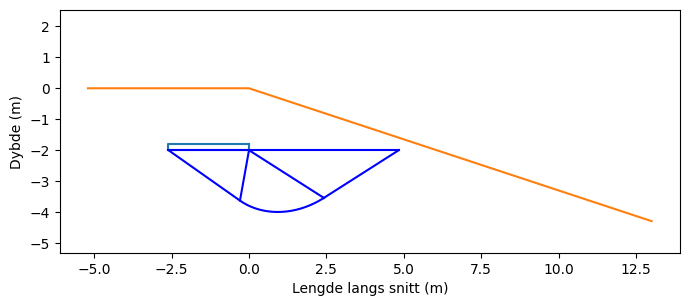

In [6]:
#Fundament med soner plottes
plot = geo_plot.plot_samla(fundament, jordprofil)

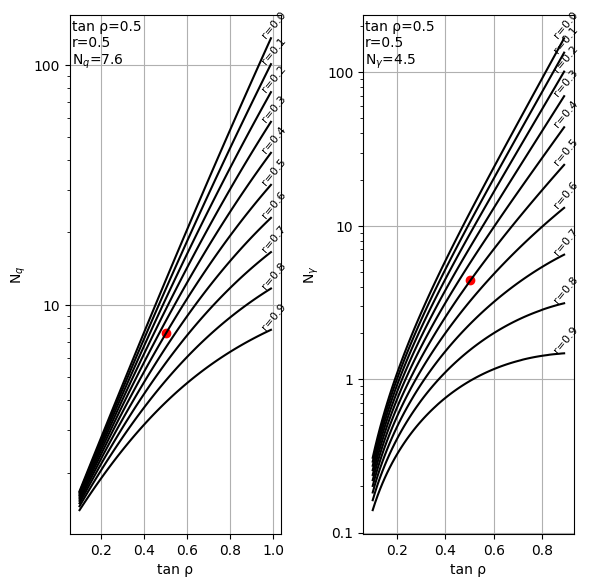

In [7]:
#Bærevne geometri plottes
geo_plot.plot_nfakt(fundament.tan_fi_d, fundament.rb, fundament.nq, fundament.n_gamma)
plt.show()

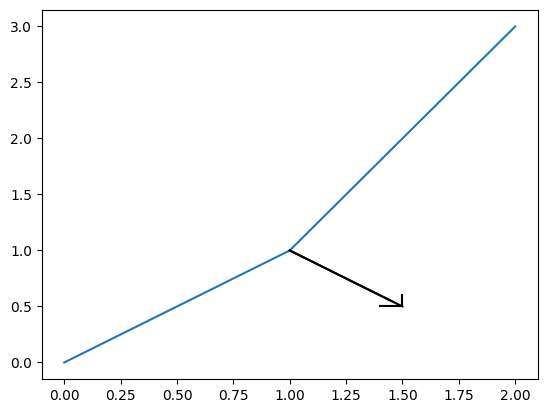

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = [0, 1, 2]
y = [0, 1, 3]

fig, ax = plt.subplots()
ax.plot(x, y)

arrow_end = [1 + 0.5, 1 - 0.5]
arrow_head_length = 0.1
arrow_head_width = 0.1

plt.plot([1, arrow_end[0] - arrow_head_length * (arrow_end[0] - 1)],
         [1, arrow_end[1] - arrow_head_length * (arrow_end[1] - 1)],
         'k-', linewidth=1.5)
plt.plot([arrow_end[0] - arrow_head_length * (arrow_end[0] - 1) + arrow_head_width * (arrow_end[1] - 1),
          arrow_end[0],
          arrow_end[0] - arrow_head_length * (arrow_end[0] - 1) - arrow_head_width * (arrow_end[1] - 1)],
         [arrow_end[1] - arrow_head_length * (arrow_end[1] - 1) - arrow_head_width * (arrow_end[0] - 1),
          arrow_end[1],
          arrow_end[1] - arrow_head_length * (arrow_end[1] - 1) + arrow_head_width * (arrow_end[0] - 1)],
         'k-', linewidth=1.5)
plt.plot([1, arrow_end[0]], [1, arrow_end[1]], 'k-', linewidth=1.5)

plt.show()

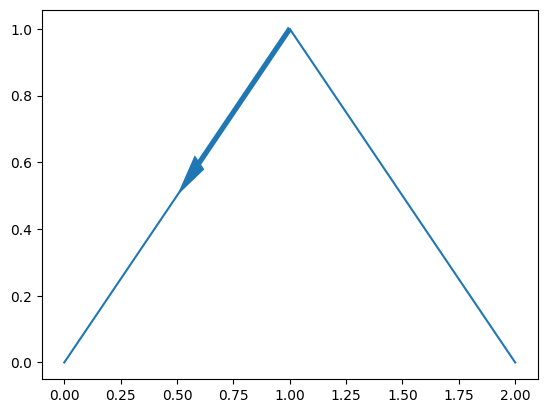

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x = [0, 1, 2]
y = [0, 1, 0]

fig, ax = plt.subplots()
ax.plot(x, y)

arrow = patches.Arrow(1, 1, -0.5, -0.5, width=0.1)
ax.add_patch(arrow)

plt.show()

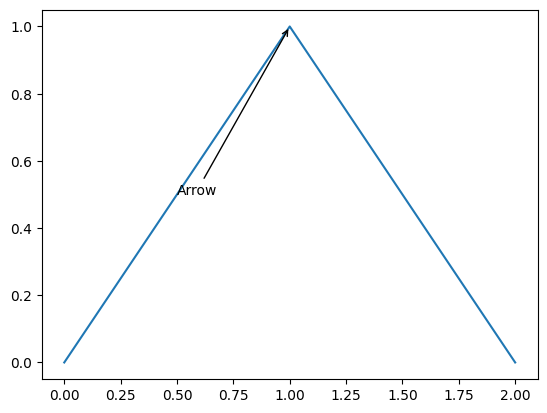

In [8]:
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [0, 1, 0]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.annotate("Arrow", xy=(1, 1), xytext=(0.5, 0.5),
            arrowprops=dict(arrowstyle="->"))

plt.show()